In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import nilmtk

In [3]:
X_train = pd.read_csv("X_train.csv")
X_train = X_train.drop(X_train.columns[-1],axis=1)
X_train.head(5)

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
0,2013-03-17T00:01:00.0,550.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-03-17T00:02:00.0,548.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-17T00:03:00.0,549.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-03-17T00:04:00.0,549.3667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-03-17T00:05:00.0,548.8909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X_train.shape

(417599, 9)

In [5]:
X_train.isna().sum()

time_step           0
consumption     10231
visibility     410663
temperature    410652
humidity       410663
humidex        410663
windchill      410671
wind           410663
pressure       410667
dtype: int64

In [6]:
y_train = pd.read_csv("y_train.csv")
y_train.head(5)

,time_step,washing_machine,fridge_freezer,TV,kettle
0,2013-03-17T00:01:00.0,0.0,79.2000,7.0,0.0
1,2013-03-17T00:02:00.0,0.0,78.0000,7.0,0.0
2,2013-03-17T00:03:00.0,0.0,76.9000,7.0,0.0
3,2013-03-17T00:04:00.0,0.0,76.1111,7.0,0.0
4,2013-03-17T00:05:00.0,0.0,75.2727,7.0,0.0


In [7]:
y_train.shape

(417599, 5)

In [8]:
y_train.isna().sum()

time_step              0
washing_machine    10231
fridge_freezer     10231
TV                 10231
kettle             10231
dtype: int64

In [9]:
X_test = pd.read_csv("X_test.csv")
X_test = X_test.drop(X_test.columns[-1],axis=1)
X_test.head(5)

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
0,2014-01-01T00:00:00.0,312.2222,30.0,8.4,86.0,8.4,5.6,17.0,1016.6
1,2014-01-01T00:01:00.0,318.8750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01T00:02:00.0,314.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01T00:03:00.0,311.4444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-01T00:04:00.0,310.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X_test.shape

(226081, 9)

In [11]:
X_test.isna().sum()

time_step           0
consumption     24719
visibility     222333
temperature    222331
humidity       222337
humidex        222337
windchill      222347
wind           222340
pressure       222338
dtype: int64

In [12]:
type(X_train.visibility[0])

numpy.float64

In [13]:
X_train.visibility[0] == float("nan")

False

In [14]:
X_train[X_train.visibility.notnull()]

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
59,2013-03-17T01:00:00.0,586.9000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3
119,2013-03-17T02:00:00.0,538.4949,11.0,8.9,88.0,8.9,6.2,17.0,1016.9
179,2013-03-17T03:00:00.0,535.6000,23.0,9.5,79.0,9.5,6.5,22.0,1016.6
239,2013-03-17T04:00:00.0,517.7000,22.0,9.5,79.0,9.5,6.7,19.0,1016.3
299,2013-03-17T05:00:00.0,520.3000,19.0,9.3,83.0,9.3,6.5,19.0,1016.0
...,...,...,...,...,...,...,...,...,...
417299,2013-12-31T19:00:00.0,3038.0000,16.0,9.9,93.0,10.6,6.8,24.0,1017.3
417359,2013-12-31T20:00:00.0,371.0000,28.0,10.1,92.0,10.8,7.4,20.0,1016.7
417419,2013-12-31T21:00:00.0,293.2222,17.0,10.3,92.0,11.1,7.1,26.0,1016.3
417479,2013-12-31T22:00:00.0,294.3750,19.0,10.4,89.0,11.0,6.8,33.0,1015.9


### 线性插值

In [15]:
X_train.iloc[119:180]

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
119,2013-03-17T02:00:00.0,538.4949,11.0,8.9,88.0,8.9,6.2,17.0,1016.9
120,2013-03-17T02:01:00.0,538.5333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2013-03-17T02:02:00.0,538.8889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,2013-03-17T02:03:00.0,531.8889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2013-03-17T02:04:00.0,615.7750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
175,2013-03-17T02:56:00.0,532.5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2013-03-17T02:57:00.0,532.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2013-03-17T02:58:00.0,532.3556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2013-03-17T02:59:00.0,532.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample1 = X_train.interpolate(method='linear')

In [17]:
sample1 = sample1.interpolate(method='linear', limit_direction='both')

In [18]:
sample1['consumption'] = X_train['consumption']

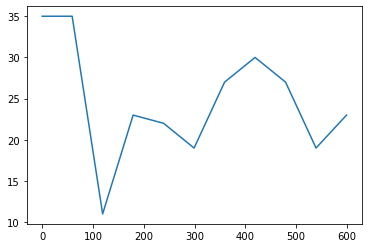

In [19]:
sample1.iloc[0:600]['visibility'].plot()

In [20]:
X_train_imputed = sample1.copy()

In [21]:
X_train_imputed.isna().sum()

time_step          0
consumption    10231
visibility         0
temperature        0
humidity           0
humidex            0
windchill          0
wind               0
pressure           0
dtype: int64

In [22]:
y_train

,time_step,washing_machine,fridge_freezer,TV,kettle
0,2013-03-17T00:01:00.0,0.0,79.2000,7.0000,0.0
1,2013-03-17T00:02:00.0,0.0,78.0000,7.0000,0.0
2,2013-03-17T00:03:00.0,0.0,76.9000,7.0000,0.0
3,2013-03-17T00:04:00.0,0.0,76.1111,7.0000,0.0
4,2013-03-17T00:05:00.0,0.0,75.2727,7.0000,0.0
...,...,...,...,...,...
417594,2013-12-31T23:55:00.0,0.0,54.0000,65.7778,0.0
417595,2013-12-31T23:56:00.0,0.0,4.6667,65.1111,0.0
417596,2013-12-31T23:57:00.0,0.0,0.0000,65.5000,0.0
417597,2013-12-31T23:58:00.0,0.0,0.0000,65.7778,0.0


In [23]:
sample2 = X_test.interpolate(method='linear')
sample2 = sample2.interpolate(method='linear', limit_direction='both')
sample2['consumption'] = X_test['consumption']
X_test_imputed = sample2.copy()

In [24]:
X_test_imputed.isna().sum()

time_step          0
consumption    24719
visibility         0
temperature        0
humidity           0
humidex            0
windchill          0
wind               0
pressure           0
dtype: int64

### Data Integration

In [25]:
train = pd.merge(X_train_imputed, y_train,
                 how="left",
                 left_on=['time_step'],
                 right_on=['time_step'],
                 sort=False
                )

In [26]:
train

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure,washing_machine,fridge_freezer,TV,kettle
0,2013-03-17T00:01:00.0,550.4000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,79.2000,7.0000,0.0
1,2013-03-17T00:02:00.0,548.6000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,78.0000,7.0000,0.0
2,2013-03-17T00:03:00.0,549.3000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,76.9000,7.0000,0.0
3,2013-03-17T00:04:00.0,549.3667,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,76.1111,7.0000,0.0
4,2013-03-17T00:05:00.0,548.8909,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,75.2727,7.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417594,2013-12-31T23:55:00.0,342.6667,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,54.0000,65.7778,0.0
417595,2013-12-31T23:56:00.0,311.5556,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,4.6667,65.1111,0.0
417596,2013-12-31T23:57:00.0,310.5000,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,0.0000,65.5000,0.0
417597,2013-12-31T23:58:00.0,312.0000,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,0.0000,65.7778,0.0


In [27]:
train.isna().sum()

time_step              0
consumption        10231
visibility             0
temperature            0
humidity               0
humidex                0
windchill              0
wind                   0
pressure               0
washing_machine    10231
fridge_freezer     10231
TV                 10231
kettle             10231
dtype: int64

In [28]:
train[train['consumption'].notna()]

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure,washing_machine,fridge_freezer,TV,kettle
0,2013-03-17T00:01:00.0,550.4000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,79.2000,7.0000,0.0
1,2013-03-17T00:02:00.0,548.6000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,78.0000,7.0000,0.0
2,2013-03-17T00:03:00.0,549.3000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,76.9000,7.0000,0.0
3,2013-03-17T00:04:00.0,549.3667,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,76.1111,7.0000,0.0
4,2013-03-17T00:05:00.0,548.8909,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,0.0,75.2727,7.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417594,2013-12-31T23:55:00.0,342.6667,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,54.0000,65.7778,0.0
417595,2013-12-31T23:56:00.0,311.5556,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,4.6667,65.1111,0.0
417596,2013-12-31T23:57:00.0,310.5000,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,0.0000,65.5000,0.0
417597,2013-12-31T23:58:00.0,312.0000,8.0,9.6,92.0,10.1,5.7,33.0,1016.1,0.0,0.0000,65.7778,0.0


#### 比较一下扔掉这部分数据和用linear填充

In [29]:
train_notnull = train[train['consumption'].notna()]

In [30]:
import datetime as dt
import math as mt

def metric_nilm(dataframe_y_true, dataframe_y_pred):
    score = 0.0
    test = dataframe_y_true[~dataframe_y_true['washing_machine'].isna()]['washing_machine']
    pred = dataframe_y_pred[~dataframe_y_true['washing_machine'].isna()]['washing_machine']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*5.55
    test = dataframe_y_true[~dataframe_y_true['fridge_freezer'].isna()]['fridge_freezer']
    pred = dataframe_y_pred[~dataframe_y_true['fridge_freezer'].isna()]['fridge_freezer']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*49.79
    test = dataframe_y_true[~dataframe_y_true['TV'].isna()]['TV']
    pred = dataframe_y_pred[~dataframe_y_true['TV'].isna()]['TV']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*14.57
    test = dataframe_y_true[~dataframe_y_true['kettle'].isna()]['kettle']
    pred = dataframe_y_pred[~dataframe_y_true['kettle'].isna()]['kettle']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*4.95
    score /= 74.86
    return score

### TRY: Factorial Hidden Markov Models (FHMMs)

### TRY: LSTM

### TRY: ELM / Hierarchical-ELMs (H-ELMs)